## Hughes Model

(2.3) from Hughes et al. 2024

$\frac{\partial u}{\partial t}=(b+\gamma u^2)v-(1+sF+u^2)u+D\frac{\partial^2u}{\partial x^2}$

$\frac{\partial v}{\partial t}=-(b+\gamma u^2)v+(1+sF+u^2)u+\frac{\partial^2v}{\partial x^2}$

$\frac{\partial F}{\partial t}=\theta(p_0+p_1u-F)+D_F\frac{\partial^2F}{\partial x^2}$

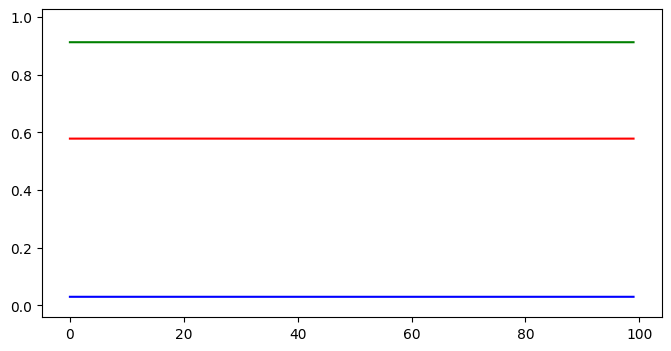

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
from pde_utils import periodic_laplacian_1D as laplacian

# define parameters
b = 0.067 # GTPase basal rate of activation
gamma = 3.557 # GTPase autocatalytic activation rate
s = 0.406 # Strength of F-actin negative feedback
theta = 0.6 # F-actin time scale parameter
p0 = 0.8 # F-actin basal assembly rate
p1 = 3.8 # GTPase-dependent F-actin assembly rate
D = 0.1 # Active GTPase rate of diffusion
Df = 0.001 # F-actin rate of diffusion
M = 2 # Average total GTPase concentration

size = 100 # number of cells
dt = 0.01  # time step
t = 1000.0 # run time
frame_int = 25 # animation frame interval

# set initial concentrations
U = 0.1+0.9*np.random.rand(size) # active GTPase
V = np.full(size, 0.1) # inactive GTPase
F = np.full(size, 0) # F-actin

# set up figure
fig, ax = plt.subplots(figsize=(8, 4))
frames = []

# simulate the PDE with finite difference method
for i in range(int(t/dt)):

    # update concentrations
    U = U + dt * ((b + gamma*U**2)*V - (1 + s*F + U**2)*U + D*laplacian(U))
    V = V + dt * (-(b + gamma*U**2)*V + (1 + s*F + U**2)*U + laplacian(V))
    F = F + dt * (theta * (p0 + p1*U - F) + Df*laplacian(F))

    # capture a frame every frame_int seconds
    if i % int(frame_int/dt) == 0:
        Uline, = ax.plot(U, color='blue')
        Vline, = ax.plot(V, color='red')
        Fline, = ax.plot(F, color='green')
        frames.append([Uline, Vline, Fline])

# save animation
animation.ArtistAnimation(fig, frames, interval=50, blit=True).save('animations/hughes.gif', writer=PillowWriter(fps=10))